In [ ]:
!pip install vaderSentiment

In [ ]:
!pip install spacy nltk vaderSentiment transformers

In [17]:
import pandas as pd
import numpy as np
import spacy
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [6]:
data = {'Headline': [
    "Tesla posts record Q4 earnings, shares rise 5%",
    "Tesla faces new safety investigation, stock falls",
    "Elon Musk tweets support for Bitcoin, sending prices higher",
    "Tesla aims to produce 2 million vehicles in 2024, stock surges",
    "Tesla announces new Gigafactory in Mexico, shares climb",
    "Cybertruck production delayed again, investors concerned",
    "Tesla's Full Self-Driving beta expands to more users",
    "Elon Musk sells $10 billion worth of Tesla stock",
    "Tesla surpasses 3 million vehicle deliveries milestone",
    "New Tesla Roadster specs revealed, pre-orders skyrocket",
    "Tesla's energy division reports strong growth in Q2",
    "Elon Musk hints at new Tesla compact car for European market",
    "Tesla faces increased competition in China, market share dips",
    "Tesla's AI Day showcases advancements in autonomous driving",
    "Tesla stock splits 3-for-1, boosting retail investor interest",
    "Elon Musk announces Tesla Bot prototype, stock reacts positively",
    "Tesla's Solar Roof installations grow 50% year-over-year",
    "Tesla recalls 200,000 vehicles due to software glitch",
    "Elon Musk teases 'Master Plan Part 3' for Tesla",
    "Tesla opens Supercharger network to other EV brands in Europe",
    "Tesla's Q1 deliveries fall short of expectations, stock dips",
    "New Tesla Model S Plaid sets record at Nürburgring",
    "Tesla launches insurance product in more U.S. states",
    "Elon Musk predicts Tesla will achieve full autonomy by 2023",
    "Tesla's market cap surpasses $1 trillion once again",
    "Tesla faces unionization efforts at Fremont factory",
    "New Tesla Semi completes 500-mile trip on single charge",
    "Tesla's new 4680 battery cells enter mass production",
    "Elon Musk announces Tesla's move into robotaxi service",
    "Tesla's German Gigafactory reaches production milestone",
    "Tesla unveils new home HVAC system, stock climbs",
    "Cybertruck pre-orders exceed 1.5 million, Tesla reports",
    "Tesla's Chinese rival XPeng launches new model, stock reacts",
    "Elon Musk announces Tesla will accept Dogecoin for merch",
    "Tesla's Model Y becomes best-selling EV globally",
    "New Tesla Gigafactory announced for India, shares soar",
    "Tesla faces scrutiny over Autopilot marketing claims",
    "Elon Musk reveals plans for $25,000 Tesla model",
    "Tesla's solar and energy storage deployments double YoY",
    "Tesla stock hits all-time high on S&P 500 inclusion anniversary",
    "New Tesla Model 3 redesign leaked, generating buzz",
    "Tesla's FSD subscription service launches globally",
    "Elon Musk says Tesla could launch a mini EV for Asian markets",
    "Tesla breaks ground on new R&D center in Palo Alto",
    "Tesla's Berlin Gigafactory faces environmental protests",
    "Elon Musk announces Tesla's entry into VTOL aircraft market",
    "Tesla surpasses BMW in luxury car sales in the U.S.",
    "New Tesla battery tech promises 500-mile range",
    "Tesla launches its own chip design for AI training",
    "Elon Musk hints at Tesla electric airplane project",
    "Tesla's Powerwall installations reach 250,000 globally",
    "Tesla introduces new entry-level Model Y variant",
    "Elon Musk announces Tesla Energy's expansion into Europe",
    "Tesla stock volatility increases as options trading surges",
    "Tesla's Cybertruck spotted testing on public roads",
    "Elon Musk reveals Tesla's plans for electric boats",
    "Tesla's Chinese sales rebound, easing investor concerns",
    "New Tesla Supercharger V4 promises 350kW charging speeds",
    "Tesla announces breakthrough in battery recycling technology",
    "Elon Musk says Tesla could enter ride-hailing market",
    "Tesla's Model S Plaid+ canceled, Musk cites sufficient performance",
    "Tesla opens new design studio in Europe, focusing on local tastes",
    "Elon Musk tweets Tesla will launch a tequila brand, stock jumps",
    "Tesla's solar roof expands to commercial buildings",
    "New Tesla update brings Steam integration to Model S and X",
    "Tesla faces increased scrutiny in China over data security",
    "Elon Musk announces Tesla will build a 'futuristic' diner and drive-in theater",
    "Tesla's Autobidder software gains traction among energy companies",
    "Tesla stock slides as Elon Musk focus shifts to Twitter",
    "New Tesla Model Y production begins at Texas Gigafactory",
    "Tesla launches virtual power plant project in California",
    "Elon Musk says Tesla could launch its own social media platform",
    "Tesla's FSD Beta expands to Canada, stock reacts positively",
    "Tesla announces new anode material for improved battery life",
    "Elon Musk reveals Tesla's plans for electric RV",
    "Tesla's Powerwall helps Texas during winter storm, orders surge",
    "New Tesla Roadster to feature SpaceX cold gas thrusters",
    "Tesla opens its charging connector design to other automakers",
    "Elon Musk says Tesla could enter home robot market",
    "Tesla's Model Y becomes Europe's best-selling car, first EV to do so",
    "Tesla announces new heat pump for improved cold-weather performance",
    "Elon Musk hints at Tesla's entry into the mining sector",
    "Tesla's Optimus robot prototype demonstrated at AI Day 2",
    "New Tesla factory announced for Southeast Asia",
    "Tesla launches its own car wash service at Supercharger stations",
    "Elon Musk says Tesla could start producing its own lithium",
    "Tesla's in-car gaming platform expands with major titles",
    "Tesla stock surges on rumors of Apple partnership",
    "New Tesla Model 2 compact car spotted testing",
    "Tesla announces plans for electric jet ski, stock climbs",
    "Elon Musk reveals Tesla's work on bi-directional charging",
    "Tesla's Megapack installations grow 300% year-over-year",
    "Tesla launches its own insurance product in China",
    "Elon Musk says Tesla could enter nuclear energy sector",
    "Tesla's Cybertruck to feature 'crab walk' mode, similar to Hummer EV",
    "New Tesla Gigafactory announced for Canada",
    "Tesla stock dips as Elon Musk sells more shares",
    "Tesla launches new home energy management system",
    "Elon Musk announces Tesla's entry into HVAC market",
    "Tesla's Full Self-Driving subscription price increases",
    "New Tesla Model S and X refresh interior leaked",
    "Tesla stock climbs as company joins Fortune 500 top 10",
]}

In [9]:
df = pd.DataFrame(data)
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
# Apply sentiment analysis to each headline
df['Sentiment_Score'] = df['Headline'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
# Classify the sentiment
df['Sentiment'] = df['Sentiment_Score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
print(df)

                                              Headline  Sentiment_Score  \
0       Tesla posts record Q4 earnings, shares rise 5%           0.2960   
1    Tesla faces new safety investigation, stock falls           0.4215   
2    Elon Musk tweets support for Bitcoin, sending ...           0.4019   
3    Tesla aims to produce 2 million vehicles in 20...           0.0000   
4    Tesla announces new Gigafactory in Mexico, sha...           0.2960   
..                                                 ...              ...   
97    Tesla launches new home energy management system           0.2732   
98   Elon Musk announces Tesla's entry into HVAC ma...           0.0000   
99   Tesla's Full Self-Driving subscription price i...           0.0000   
100    New Tesla Model S and X refresh interior leaked          -0.3182   
101  Tesla stock climbs as company joins Fortune 50...           0.2023   

    Sentiment  
0    positive  
1    positive  
2    positive  
3     neutral  
4    positive  
.. 

In [10]:
# Generate trading signals based on sentiment
df['Signal'] = df['Sentiment'].apply(lambda x: 'Buy' if x == 'positive' else ('Sell' if x == 'negative' else 'Hold'))
print(df[['Headline', 'Sentiment', 'Signal']])

                                              Headline Sentiment Signal
0       Tesla posts record Q4 earnings, shares rise 5%  positive    Buy
1    Tesla faces new safety investigation, stock falls  positive    Buy
2    Elon Musk tweets support for Bitcoin, sending ...  positive    Buy
3    Tesla aims to produce 2 million vehicles in 20...   neutral   Hold
4    Tesla announces new Gigafactory in Mexico, sha...  positive    Buy
..                                                 ...       ...    ...
97    Tesla launches new home energy management system  positive    Buy
98   Elon Musk announces Tesla's entry into HVAC ma...   neutral   Hold
99   Tesla's Full Self-Driving subscription price i...   neutral   Hold
100    New Tesla Model S and X refresh interior leaked  negative   Sell
101  Tesla stock climbs as company joins Fortune 50...  positive    Buy

[102 rows x 3 columns]


In [15]:
nlp = spacy.load('en_core_web_sm')
# Download stopwords for nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
# Initialize sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Function to preprocess text
def preprocess_text(text):
    doc = nlp(text)
    # Tokenization, lowercasing, stopwords removal, and lemmatization
    tokens = [token.lemma_.lower() for token in doc if token.text.lower() not in stop_words and not token.is_punct]
    return ' '.join(tokens)

# Function to perform NER
def named_entity_recognition(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Function to perform sentiment analysis
def analyze_sentiment(text):
    sentiment_score = sentiment_analyzer.polarity_scores(text)
    # Classify based on compound score
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply preprocessing, NER, and sentiment analysis to headlines
df['Cleaned_Headline'] = df['Headline'].apply(preprocess_text)
df['Entities'] = df['Headline'].apply(named_entity_recognition)
df['Sentiment'] = df['Headline'].apply(analyze_sentiment)

# Display the results
print(df[['Headline', 'Cleaned_Headline', 'Entities', 'Sentiment']])

                                              Headline  \
0       Tesla posts record Q4 earnings, shares rise 5%   
1    Tesla faces new safety investigation, stock falls   
2    Elon Musk tweets support for Bitcoin, sending ...   
3    Tesla aims to produce 2 million vehicles in 20...   
4    Tesla announces new Gigafactory in Mexico, sha...   
..                                                 ...   
97    Tesla launches new home energy management system   
98   Elon Musk announces Tesla's entry into HVAC ma...   
99   Tesla's Full Self-Driving subscription price i...   
100    New Tesla Model S and X refresh interior leaked   
101  Tesla stock climbs as company joins Fortune 50...   

                                      Cleaned_Headline  \
0            tesla post record q4 earning share rise 5   
1       tesla face new safety investigation stock fall   
2    elon musk tweet support bitcoin send price higher   
3    tesla aim produce 2 million vehicle 2024 stock...   
4    tesla an

<ipython-input-18-f6345078eddf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 lis

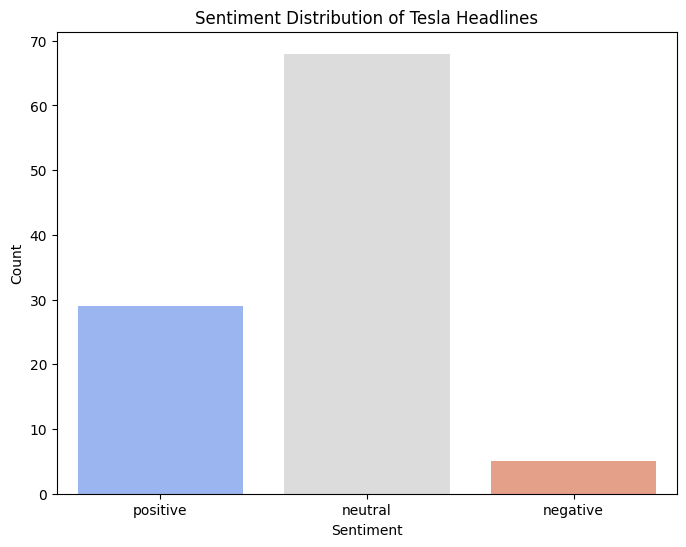

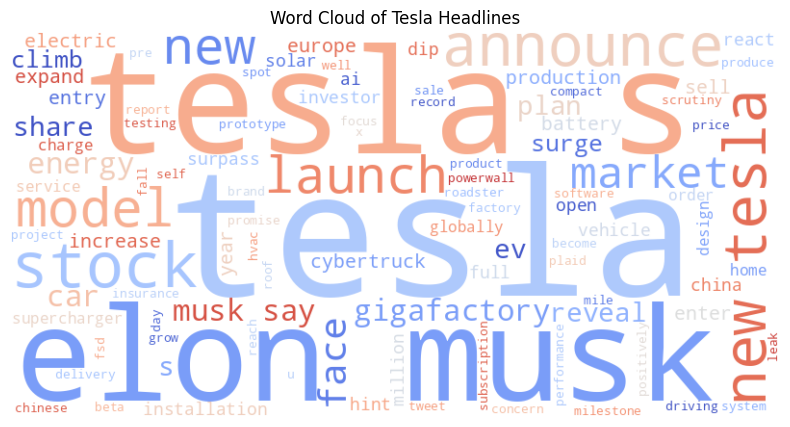

<ipython-input-18-f6345078eddf>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Entity', data=entity_df, order=entity_df['Entity'].value_counts().iloc[:10].index, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn

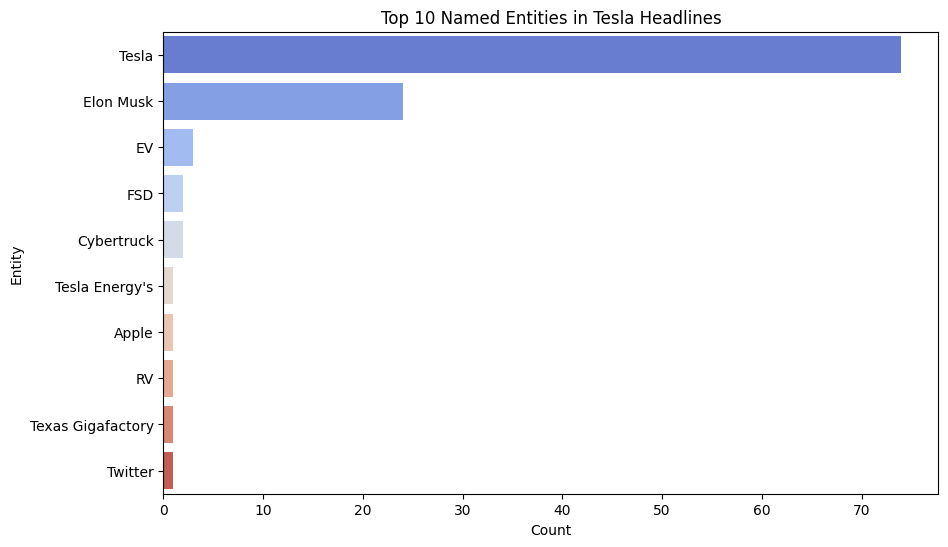

In [18]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Bar chart for sentiment distribution
def plot_sentiment_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Sentiment', data=df, palette='coolwarm')
    plt.title('Sentiment Distribution of Tesla Headlines')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# 2. Word cloud of frequent words in headlines
def generate_wordcloud(df):
    text = ' '.join(df['Cleaned_Headline'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm', max_words=100).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Tesla Headlines')
    plt.show()

# 3. Bar chart for named entity frequencies
def plot_entity_frequencies(df):
    # Flatten list of entities
    entities = [entity for entities_list in df['Entities'] for entity, label in entities_list if label in ['PERSON', 'ORG']]
    entity_df = pd.DataFrame(entities, columns=['Entity'])

    plt.figure(figsize=(10, 6))
    sns.countplot(y='Entity', data=entity_df, order=entity_df['Entity'].value_counts().iloc[:10].index, palette='coolwarm')
    plt.title('Top 10 Named Entities in Tesla Headlines')
    plt.xlabel('Count')
    plt.ylabel('Entity')
    plt.show()

# Call the functions
plot_sentiment_distribution(df)
generate_wordcloud(df)
plot_entity_frequencies(df)
